In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [473]:
# read data and print data frame
room = pd.read_csv('room.csv', sep=',') 
room.columns = ['wavelength','intensity']

# read data and print data frame
InP = pd.read_csv('InP.csv', sep=',') 
InP.columns = ['wavelength','intensity']


# read data and print data frame
InGaP = pd.read_csv('InGaP.csv', sep=',') 
InGaP.columns = ['wavelength','intensity']


# read data and print data frame
GaAs = pd.read_csv('GaAs.csv', sep=',') 
GaAs.columns = ['wavelength','intensity']


# read data and print data frame
CdTe = pd.read_csv('CdTe.csv', sep=',') 
CdTe.columns = ['wavelength','intensity']

In [474]:
def critical_max(x,y):
      cp_x,cp_y,cp_i=[],[],[]
      for i in range(len(x)):
        if i+1<len(x) and i-1>=0:
          d1=(y[i+1]-y[i])/(x[i+1]-x[i])
          d2=(y[i]-y[i-1])/(x[i]-x[i-1])
          if d1*d2<0 and y[i]>=y[i+1] and y[i]>=y[i-1]:
            cp_i.append(i)
            cp_x.append(x[i])
            cp_y.append(y[i])
      return cp_i,cp_x,cp_y

3647
934     9950.366
1269    9128.676
1136    2914.200
666     1753.368
1342    1627.526
424      716.164
1758     610.786
Name: intensity, dtype: float64
9.905438108085605
4.206452263300408
543.39
611.496
584.643
487.814
626.13
436.828
708.048


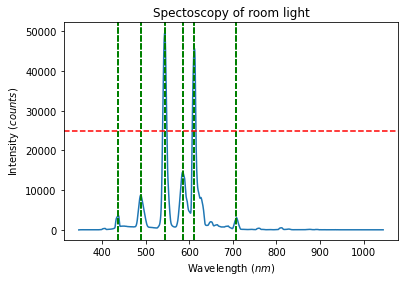

-41.61182907583907
-17.67091679198449


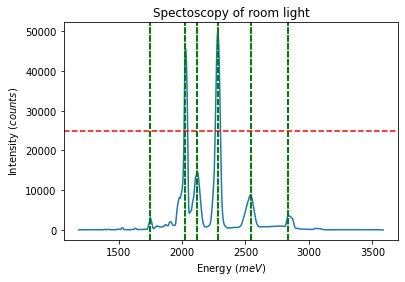

In [489]:
X = room.wavelength
print(len(X))
Y = room.intensity
index, xvalues, yvalues= critical_max(X, Y)
yvalues.sort() # sorting the peak 

y = np.array(Y) # changing array_y from [] into array
n=7
#print(yvalues[-n:]) # print the biggest peak

peak_index_array = []
for i in range(1,n+1,1):
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])

print(Y[peak_index_array]/5)
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return half, difference
    
# Delta mu_2
mu_2_array = []
x = np.array(X)
y = np.array(Y)
mu_2_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(X, Y)
for i in range(0,n,1):
    print(X[peak_index_array[i]])
    plt.axvline( x = X[peak_index_array[0]], color = 'green', linestyle = '--')
    plt.axvline( x = X[peak_index_array[1]], color = 'green', linestyle = '--')
    plt.axvline( x = X[peak_index_array[2]], color = 'green', linestyle = '--')
    plt.axvline( x = X[peak_index_array[3]], color = 'green', linestyle = '--')
    plt.axvline( x = X[peak_index_array[5]], color = 'green', linestyle = '--')
    plt.axvline( x = X[peak_index_array[6]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of room light')
plt.xlabel('Wavelength $(nm)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()
#Intensity versus photon energy
E = 1239513 / X
mu_array = []
x = np.array(E)
y = np.array(Y)
mu_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(E,Y)
for i in range(0,n,1):
    #print(E[peak_index_array[i]])
    plt.axvline( x = E[peak_index_array[0]], color = 'green', linestyle = '--')
    plt.axvline( x = E[peak_index_array[1]], color = 'green', linestyle = '--')
    plt.axvline( x = E[peak_index_array[2]], color = 'green', linestyle = '--')
    plt.axvline( x = E[peak_index_array[3]], color = 'green', linestyle = '--')
    plt.axvline( x = E[peak_index_array[5]], color = 'green', linestyle = '--')
    plt.axvline( x = E[peak_index_array[6]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of room light')
plt.xlabel('Energy $(meV)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()

# nitrogen 337.1 nm
# oxygen 558 and 630 nm
# water 760nm and 660 and 605 nm
# CO2 15 micron meter
# Argon 707 nm ~ 696 nm
# Neon 585 nm ~ 640 nm
# Helium 588~389 nm

In [476]:
X = GaAs.wavelength
Y = GaAs.intensity
index, xvalues, yvalues= critical_max(X, Y)
yvalues.sort() # sorting the peak 

y = np.array(Y) # changing array_y from [] into array
n=2
print(yvalues[-n:]) # print the biggest peak

peak_index_array = []
for i in range(1,n+1,1):
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return half, difference
    
# Delta mu_2
mu_2_array = []
x = np.array(X)
y = np.array(Y)
mu_2_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

[5448.26, 5464.76]
26.679572119686917


854.522


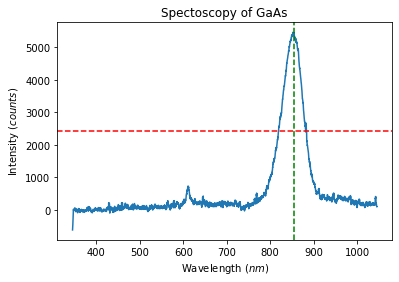

-107.91958501718705
-45.82922811656662
1450.5337486922513


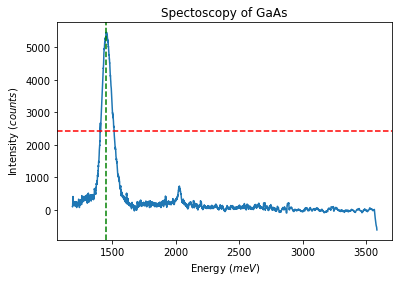

In [477]:
plt.plot(X, Y)
for i in range(1,n,1):
    print(X[peak_index_array[i]])
    plt.axvline( x = X[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of GaAs')
plt.xlabel('Wavelength $(nm)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()
#Intensity versus photon energy
E = 1239513 / X
mu_array = []
x = np.array(E)
y = np.array(Y)
mu_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(E,Y)
for i in range(1,n,1):
    print(E[peak_index_array[i]])
    plt.axvline( x = E[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of GaAs')
plt.xlabel('Energy $(meV)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()

0.22977385621823032
0.09757597261119391
920.892


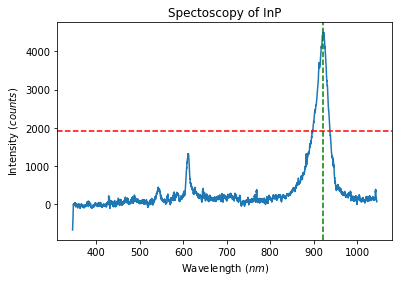

-0.3544609154710088
-0.15052569142978825
1345.991712383211


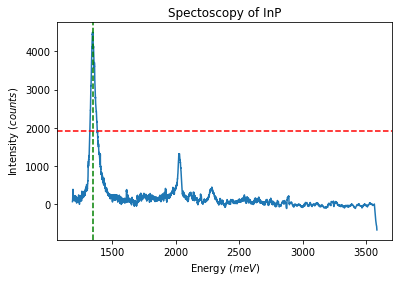

In [478]:
X = InP.wavelength
Y = InP.intensity
index, xvalues, yvalues= critical_max(X, Y)
yvalues.sort() # sorting the peak 

y = np.array(Y) # changing array_y from [] into array
n=2
#print(yvalues[-n:]) # print the biggest peak

peak_index_array = []
for i in range(1,n+1,1):
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return half, difference
    
# Delta mu_2
mu_2_array = []
x = np.array(X)
y = np.array(Y)
mu_2_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(X, Y)
for i in range(1,n,1):
    print(X[peak_index_array[i]])
    plt.axvline( x = X[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of InP')
plt.xlabel('Wavelength $(nm)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()
#Intensity versus photon energy
E = 1239513 / X
mu_array = []
x = np.array(E)
y = np.array(Y)
mu_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(E,Y)
for i in range(1,n,1):
    print(E[peak_index_array[i]])
    plt.axvline( x = E[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of InP')
plt.xlabel('Energy $(meV)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()

22.63067420133393
9.610362477204282
656.553


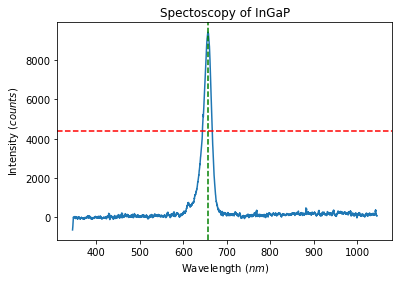

-65.3223215621424
-27.739835874075837
1887.910039250449


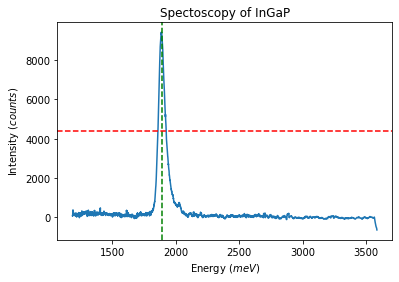

In [479]:
X = InGaP.wavelength
Y = InGaP.intensity
index, xvalues, yvalues= critical_max(X, Y)
yvalues.sort() # sorting the peak 

y = np.array(Y) # changing array_y from [] into array
n=2
#print(yvalues[-n:]) # print the biggest peak

peak_index_array = []
for i in range(1,n+1,1):
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return half, difference
    
# Delta mu_2
mu_2_array = []
x = np.array(X)
y = np.array(Y)
mu_2_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(X, Y)
for i in range(1,n,1):
    print(X[peak_index_array[i]])
    plt.axvline( x = X[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of InGaP')
plt.xlabel('Wavelength $(nm)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()
#Intensity versus photon energy
E = 1239513 / X
mu_array = []
x = np.array(E)
y = np.array(Y)
mu_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(E,Y)
for i in range(1,n,1):
    print(E[peak_index_array[i]])
    plt.axvline( x = E[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of InGaP')
plt.xlabel('Energy $(meV)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()

11.427216713057305
4.852692135507585
611.094


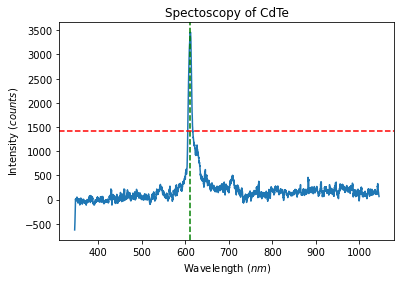

-37.90533310533783
-16.096912876771288
2028.350793822227


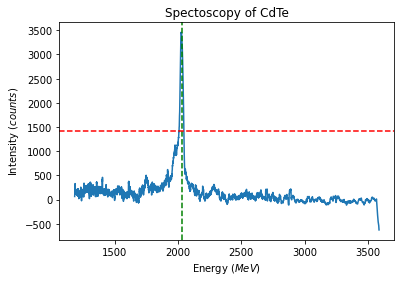

In [480]:
X = CdTe.wavelength
Y = CdTe.intensity
index, xvalues, yvalues= critical_max(X, Y)
yvalues.sort() # sorting the peak 

y = np.array(Y) # changing array_y from [] into array
n=2
#print(yvalues[-n:]) # print the biggest peak

peak_index_array = []
for i in range(1,n+1,1):
    peak_index_array.append( np.where(y == yvalues[-i])[0][0])
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = (max(y)-min(y))/2.0 + min(y)
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    difference = lin_interp(x, y, zero_crossings_i[1], half) - lin_interp(x, y, zero_crossings_i[0], half)
    return half, difference
    
# Delta mu_2
mu_2_array = []
x = np.array(X)
y = np.array(Y)
mu_2_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(X, Y)
for i in range(1,n,1):
    print(X[peak_index_array[i]])
    plt.axvline( x = X[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of CdTe')
plt.xlabel('Wavelength $(nm)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()
#Intensity versus photon energy
E = 1239513 / X
mu_array = []
x = np.array(E)
y = np.array(Y)
mu_array.append(half_max_x(x, y)[1])
half_max, difference  = half_max_x(x,y)
print(half_max_x(x, y)[1])
print(half_max_x(x, y)[1]/(2*np.sqrt(2*np.log(2))))

plt.plot(E,Y)
for i in range(1,n,1):
    print(E[peak_index_array[i]])
    plt.axvline( x = E[peak_index_array[i]], color = 'green', linestyle = '--')
plt.title('Spectoscopy of CdTe')
plt.xlabel('Energy $(MeV)$')
plt.ylabel('Intensity $(counts)$')
plt.axhline(y = half_max ,color = 'red', linestyle='--')
plt.show()



In [481]:
# E = h c / \lambda
print(1.562 / 1239513)


1239513 * (1.5 * 10**(-6) )


1.2601723418794317e-06


1.8592695000000001

In [482]:
from scipy.optimize import fsolve
f = lambda x: (1345.99-2100.8694) + 512 * x + 603* x**2

fsolve(f, [-80, 80])

array([-1.62125215,  0.77216426])

In [483]:
1239513 / 590

2100.8694915254237

In [484]:
hbar = 6.582 * 10 **(-16)
m_0 = 9.11 * 10 **(-31)
m = 0.09*m_0
Enp = 2028.351 /1000
Eo = 1490 /1000

In [485]:
from scipy.optimize import fsolve
f = lambda x: (Eo-Enp) + hbar**2 /(2*m) * np.pi**2/x**2 

fsolve(f, [-10000,10000])

/Users/angus/miniforge3/envs/tensorflow_env/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 5625., -5625.])

In [486]:
16.097/2028.351 * 6.96 * 0.5

0.027617291090151555

In [487]:
# d = hbar * pi / sqrt(2m(Enp- Eo))
hbar*np.pi / np.sqrt(2*m * (Enp - Eo))

6.9595241717459855